In [268]:
import warnings
warnings.filterwarnings("ignore")

In [269]:
import numpy as np
import pandas as pd

In [270]:
dataset=pd.read_csv("train_data.csv")
product_prices=pd.read_csv("product_prices.csv")
date_week=pd.read_csv("date_to_week_id_map.csv")

In [271]:
dataset.columns


Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales'],
      dtype='object')

In [272]:
product_prices.columns


Index(['outlet', 'product_identifier', 'week_id', 'sell_price'], dtype='object')

In [273]:
date_week.columns

Index(['date', 'week_id'], dtype='object')

In [274]:
dataset.shape, product_prices.shape, date_week.shape

((395000, 7), (59000, 4), (821, 2))

In [275]:
df=pd.merge(dataset,date_week, on=['date'],how='inner')

In [276]:
data=pd.merge(product_prices,df,on=['week_id','outlet','product_identifier'],how='inner')

In [277]:
data

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state,sales
0,111,74,49,2.94,2012-01-01,11,others,Maharashtra,0
1,111,74,49,2.94,2012-01-02,11,others,Maharashtra,0
2,111,74,49,2.94,2012-01-03,11,others,Maharashtra,1
3,111,74,49,2.94,2012-01-04,11,others,Maharashtra,0
4,111,74,49,2.94,2012-01-05,11,others,Maharashtra,0
...,...,...,...,...,...,...,...,...,...
394995,333,3021,161,2.08,2014-02-24,33,drinks_and_food,Kerala,0
394996,333,3021,161,2.08,2014-02-25,33,drinks_and_food,Kerala,0
394997,333,3021,161,2.08,2014-02-26,33,drinks_and_food,Kerala,0
394998,333,3021,161,2.08,2014-02-27,33,drinks_and_food,Kerala,0


In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   outlet                 395000 non-null  int64  
 1   product_identifier     395000 non-null  int64  
 2   week_id                395000 non-null  int64  
 3   sell_price             395000 non-null  float64
 4   date                   395000 non-null  object 
 5   department_identifier  395000 non-null  int64  
 6   category_of_product    395000 non-null  object 
 7   state                  395000 non-null  object 
 8   sales                  395000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 30.1+ MB


In [279]:
data.describe()

,outlet,product_identifier,week_id,sell_price,department_identifier,sales
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,211.200000,1509.960000,105.070886,4.987644,24.460000,1.228919
std,91.161291,809.799518,32.578749,3.874444,6.337863,3.595266
min,111.000000,74.000000,49.000000,0.050000,11.000000,0.000000
25%,113.000000,926.000000,77.000000,2.680000,21.000000,0.000000
50%,221.500000,1325.000000,105.000000,3.980000,22.000000,0.000000
75%,331.000000,1753.000000,133.000000,6.480000,31.000000,1.000000
max,333.000000,3021.000000,161.000000,44.360000,33.000000,293.000000


In [280]:
#printing first 5 rows of train data set
data.head()

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state,sales
0,111,74,49,2.94,2012-01-01,11,others,Maharashtra,0
1,111,74,49,2.94,2012-01-02,11,others,Maharashtra,0
2,111,74,49,2.94,2012-01-03,11,others,Maharashtra,1
3,111,74,49,2.94,2012-01-04,11,others,Maharashtra,0
4,111,74,49,2.94,2012-01-05,11,others,Maharashtra,0


In [281]:
data.tail()

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state,sales
394995,333,3021,161,2.08,2014-02-24,33,drinks_and_food,Kerala,0
394996,333,3021,161,2.08,2014-02-25,33,drinks_and_food,Kerala,0
394997,333,3021,161,2.08,2014-02-26,33,drinks_and_food,Kerala,0
394998,333,3021,161,2.08,2014-02-27,33,drinks_and_food,Kerala,0
394999,333,3021,161,2.08,2014-02-28,33,drinks_and_food,Kerala,0


In [282]:
#Verify if there are any null values in each of the columns
data.isnull().sum()

outlet                   0
product_identifier       0
week_id                  0
sell_price               0
date                     0
department_identifier    0
category_of_product      0
state                    0
sales                    0
dtype: int64

In [283]:
#Explore the data types of each column.
data.dtypes

outlet                     int64
product_identifier         int64
week_id                    int64
sell_price               float64
date                      object
department_identifier      int64
category_of_product       object
state                     object
sales                      int64
dtype: object

In [284]:
##converting as category
col = ['category_of_product', 'state']
data[col] = data[col].astype('category')

In [285]:
data.dtypes

outlet                      int64
product_identifier          int64
week_id                     int64
sell_price                float64
date                       object
department_identifier       int64
category_of_product      category
state                    category
sales                       int64
dtype: object

In [286]:
import matplotlib.pyplot as plt

In [287]:
def scatter(data, column):
    plt.figure()
    plt.scatter(data[column] , dataset['sales'])
    plt.ylabel('sales')
    plt.xlabel(column)

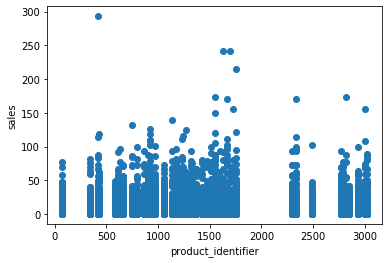

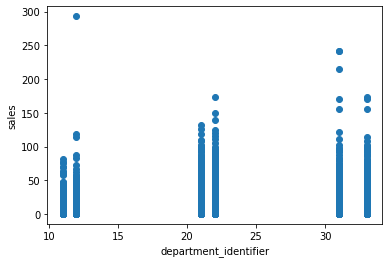

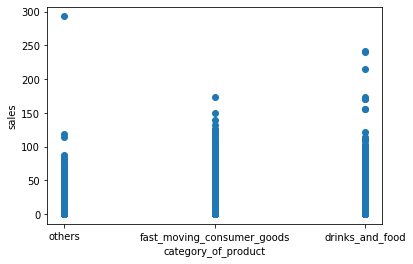

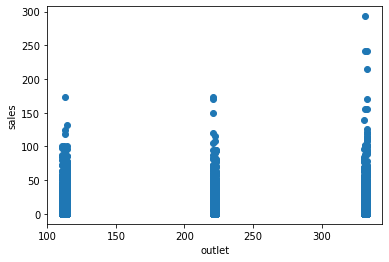

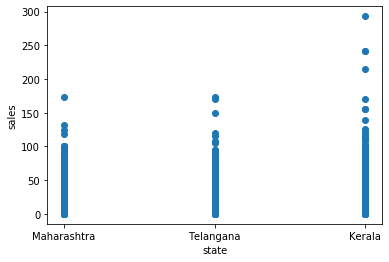

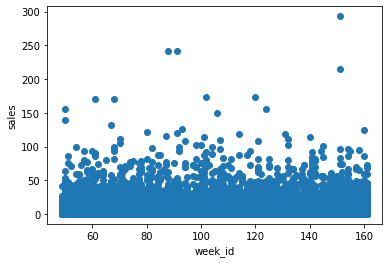

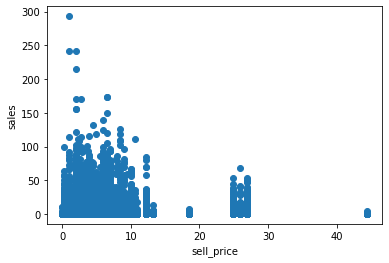

In [288]:
scatter(data, 'product_identifier')
scatter(data, 'department_identifier')
scatter(data, 'category_of_product')
scatter(data, 'outlet')
scatter(data, 'state')
scatter(data, 'week_id')
scatter(data, 'sell_price')

AttributeError: 'Figure' object has no attribute 'sns'

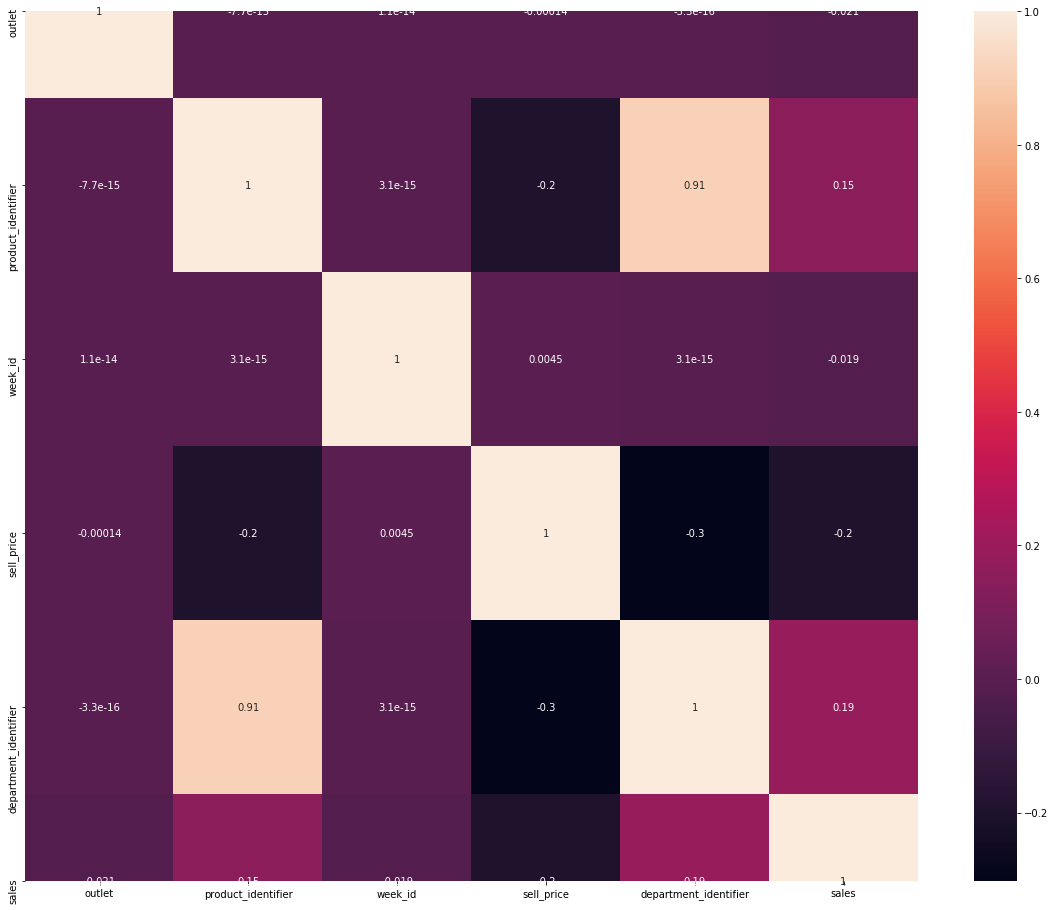

In [294]:
import seaborn as sns
fig = plt.figure(figsize=(20, 16))
axe=sns.heatmap(data.corr(), annot=True)
print(fig.sns.heatmap(data.corr(), annot=True))

In [295]:
data['Month'] = pd.to_datetime(data['date']).dt.month

In [296]:
data.head()

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state,sales,Month
0,111,74,49,2.94,2012-01-01,11,others,Maharashtra,0,1
1,111,74,49,2.94,2012-01-02,11,others,Maharashtra,0,1
2,111,74,49,2.94,2012-01-03,11,others,Maharashtra,1,1
3,111,74,49,2.94,2012-01-04,11,others,Maharashtra,0,1
4,111,74,49,2.94,2012-01-05,11,others,Maharashtra,0,1


In [297]:

data21=data

In [298]:
data1=data

In [299]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()

In [300]:
enc_data=pd.DataFrame(enc.fit_transform(data21[['category_of_product','state']]).toarray())
 

In [301]:
data4=data21.join(enc_data)

In [351]:
data4

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state,sales,Month,0,1,2,3,4,5
0,111,74,49,2.94,2012-01-01,11,others,Maharashtra,0,1,0.0,0.0,1.0,0.0,1.0,0.0
1,111,74,49,2.94,2012-01-02,11,others,Maharashtra,0,1,0.0,0.0,1.0,0.0,1.0,0.0
2,111,74,49,2.94,2012-01-03,11,others,Maharashtra,1,1,0.0,0.0,1.0,0.0,1.0,0.0
3,111,74,49,2.94,2012-01-04,11,others,Maharashtra,0,1,0.0,0.0,1.0,0.0,1.0,0.0
4,111,74,49,2.94,2012-01-05,11,others,Maharashtra,0,1,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394995,333,3021,161,2.08,2014-02-24,33,drinks_and_food,Kerala,0,2,1.0,0.0,0.0,1.0,0.0,0.0
394996,333,3021,161,2.08,2014-02-25,33,drinks_and_food,Kerala,0,2,1.0,0.0,0.0,1.0,0.0,0.0
394997,333,3021,161,2.08,2014-02-26,33,drinks_and_food,Kerala,0,2,1.0,0.0,0.0,1.0,0.0,0.0
394998,333,3021,161,2.08,2014-02-27,33,drinks_and_food,Kerala,0,2,1.0,0.0,0.0,1.0,0.0,0.0


In [352]:
data4=data4.drop(columns=["category_of_product","state","week_id",'date'])

In [353]:
data4.head()

,outlet,product_identifier,sell_price,department_identifier,sales,Month,0,1,2,3,4,5
0,111,74,2.94,11,0,1,0.0,0.0,1.0,0.0,1.0,0.0
1,111,74,2.94,11,0,1,0.0,0.0,1.0,0.0,1.0,0.0
2,111,74,2.94,11,1,1,0.0,0.0,1.0,0.0,1.0,0.0
3,111,74,2.94,11,0,1,0.0,0.0,1.0,0.0,1.0,0.0
4,111,74,2.94,11,0,1,0.0,0.0,1.0,0.0,1.0,0.0


In [355]:
x_trainss=data4.drop(columns=["sales"])

In [356]:
y_trainss=data4['sales']

In [302]:
data.head()

,outlet,product_identifier,week_id,sell_price,date,department_identifier,category_of_product,state,sales,Month
0,111,74,49,2.94,2012-01-01,11,others,Maharashtra,0,1
1,111,74,49,2.94,2012-01-02,11,others,Maharashtra,0,1
2,111,74,49,2.94,2012-01-03,11,others,Maharashtra,1,1
3,111,74,49,2.94,2012-01-04,11,others,Maharashtra,0,1
4,111,74,49,2.94,2012-01-05,11,others,Maharashtra,0,1


In [303]:
data1 = data1.drop(columns=["date"])

In [304]:
data1.head()

,outlet,product_identifier,week_id,sell_price,department_identifier,category_of_product,state,sales,Month
0,111,74,49,2.94,11,others,Maharashtra,0,1
1,111,74,49,2.94,11,others,Maharashtra,0,1
2,111,74,49,2.94,11,others,Maharashtra,1,1
3,111,74,49,2.94,11,others,Maharashtra,0,1
4,111,74,49,2.94,11,others,Maharashtra,0,1


In [305]:
# Maharastra=1; Kerala = 0; Telangana=2
from sklearn.preprocessing import LabelEncoder
data1['state_encoded_values'] = LabelEncoder().fit_transform(dataset['state'])
data1[['state', 'state_encoded_values']]

,state,state_encoded_values
0,Maharashtra,1
1,Maharashtra,1
2,Maharashtra,1
3,Maharashtra,1
4,Maharashtra,1
...,...,...
394995,Kerala,0
394996,Kerala,0
394997,Kerala,0
394998,Kerala,0


In [306]:
data1['cat_prod_encoded_values'] = LabelEncoder().fit_transform(dataset['category_of_product'])
data1[['category_of_product', 'cat_prod_encoded_values']]
# drinks_and_food=0; fast_moving_consumer_goods=1; others=2

,category_of_product,cat_prod_encoded_values
0,others,2
1,others,2
2,others,2
3,others,2
4,others,1
...,...,...
394995,drinks_and_food,0
394996,drinks_and_food,0
394997,drinks_and_food,0
394998,drinks_and_food,0


In [307]:
data1 = data1.drop(columns=["category_of_product",'state'])

In [308]:
data1.head()

,outlet,product_identifier,week_id,sell_price,department_identifier,sales,Month,state_encoded_values,cat_prod_encoded_values
0,111,74,49,2.94,11,0,1,1,2
1,111,74,49,2.94,11,0,1,1,2
2,111,74,49,2.94,11,1,1,1,2
3,111,74,49,2.94,11,0,1,1,2
4,111,74,49,2.94,11,0,1,1,1


In [309]:
data12=data1

In [310]:
dataset_test=pd.read_csv("test_data.csv")

In [311]:
dataset_test.columns

Index(['id', 'date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state'],
      dtype='object')

In [312]:
dataset.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales'],
      dtype='object')

In [313]:
df1=pd.merge(dataset_test,date_week, on=['date'],how='inner')

In [314]:
data_test=pd.merge(product_prices,df1,on=['week_id','outlet','product_identifier'],how='inner')

In [315]:
data_test.head()

,outlet,product_identifier,week_id,sell_price,id,date,department_identifier,category_of_product,state
0,111,74,162,3.43,1,2014-03-01,11,others,Maharashtra
1,111,74,162,3.43,501,2014-03-02,11,others,Maharashtra
2,111,74,162,3.43,1001,2014-03-03,11,others,Maharashtra
3,111,74,162,3.43,1501,2014-03-04,11,others,Maharashtra
4,111,74,162,3.43,2001,2014-03-05,11,others,Maharashtra


In [316]:
data_test1=data_test

In [317]:
data_test['state_encoded_values'] = LabelEncoder().fit_transform(data_test['state'])
data_test[['state', 'state_encoded_values']]

,state,state_encoded_values
0,Maharashtra,1
1,Maharashtra,1
2,Maharashtra,1
3,Maharashtra,1
4,Maharashtra,1
...,...,...
15495,Kerala,0
15496,Kerala,0
15497,Kerala,0
15498,Kerala,0


In [318]:
data_test['cat_prod_encoded_values'] = LabelEncoder().fit_transform(data_test['category_of_product'])
data_test[['category_of_product', 'cat_prod_encoded_values']]

,category_of_product,cat_prod_encoded_values
0,others,2
1,others,2
2,others,2
3,others,2
4,others,2
...,...,...
15495,drinks_and_food,0
15496,drinks_and_food,0
15497,drinks_and_food,0
15498,drinks_and_food,0


In [319]:
data_test['Month'] = pd.to_datetime(data_test['date']).dt.month

In [320]:
data_test = data_test.drop(columns=["date","state","category_of_product","id"])
data_test

,outlet,product_identifier,week_id,sell_price,department_identifier,state_encoded_values,cat_prod_encoded_values,Month
0,111,74,162,3.43,11,1,2,3
1,111,74,162,3.43,11,1,2,3
2,111,74,162,3.43,11,1,2,3
3,111,74,162,3.43,11,1,2,3
4,111,74,162,3.43,11,1,2,3
...,...,...,...,...,...,...,...,...
15495,333,3021,165,2.08,33,0,0,3
15496,333,3021,165,2.08,33,0,0,3
15497,333,3021,166,2.08,33,0,0,3
15498,333,3021,166,2.08,33,0,0,3


In [321]:
data1

,outlet,product_identifier,week_id,sell_price,department_identifier,sales,Month,state_encoded_values,cat_prod_encoded_values
0,111,74,49,2.94,11,0,1,1,2
1,111,74,49,2.94,11,0,1,1,2
2,111,74,49,2.94,11,1,1,1,2
3,111,74,49,2.94,11,0,1,1,2
4,111,74,49,2.94,11,0,1,1,1
...,...,...,...,...,...,...,...,...,...
394995,333,3021,161,2.08,33,0,2,0,0
394996,333,3021,161,2.08,33,0,2,0,0
394997,333,3021,161,2.08,33,0,2,0,0
394998,333,3021,161,2.08,33,0,2,0,0


In [322]:
data_test=data_test.drop(columns=["week_id"])

In [323]:
x_train = data1.drop(['week_id', "sales"], axis=1)

In [324]:
y_train = data1['sales']

In [325]:
x_test = data_test

In [326]:
from sklearn.preprocessing import StandardScaler

In [327]:

scaler =StandardScaler().fit(x_train)

In [328]:
x_train = scaler.transform(x_train)

In [329]:


x_test = scaler.transform(x_test)

Using LinearRegression:

In [330]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [357]:
regressor.fit(x_trainss,y_trainss)

LinearRegression()

In [331]:
y_pred=regressor.predict(x_train)

In [358]:
y_predss=regressor.predict(x_trainss)

In [332]:
rmse(y_train,y_pred)

3.4879025939896655

In [359]:
rmse(y_trainss,y_predss)

3.4686032741330357

In [333]:
def rmse(actual,predicted):
    r=np.sqrt((np.mean((actual-predicted)**2)))
    return r

In [334]:
from sklearn import linear_model

In [335]:
from sklearn.neighbors import KNeighborsRegressor

In [336]:
n_neighbors=15
knn=KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(x_train,y_train)
y1_knn=knn.predict(x_train)



In [360]:
knn.fit(x_trainss,y_trainss)
y1_knnss=knn.predict(x_trainss)



In [337]:
rmse(y_train,y1_knn)

2.62978669245647

In [361]:
rmse(y_trainss,y1_knnss)

2.9329219082399636

In [338]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)

In [339]:
clf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.9s finished


RandomForestRegressor(max_features='log2', verbose=1)

In [362]:
clf.fit(x_trainss, y_trainss)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.3s finished


RandomForestRegressor(max_features='log2', verbose=1)

In [340]:
y2_ran=clf.predict(x_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished


In [363]:
y2_ranss=clf.predict(x_trainss)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


In [341]:
rmse(y_train,y2_ran)

2.460031154031245

In [364]:
rmse(y_trainss,y2_ranss)

2.7358486055818085

In [342]:
from sklearn.ensemble import ExtraTreesRegressor

In [343]:
clf3= ExtraTreesRegressor(n_jobs=1, verbose=1)


In [344]:
clf3.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.7s finished


ExtraTreesRegressor(n_jobs=1, verbose=1)

In [345]:
y3_ex=clf3.predict(x_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished


In [346]:
rmse(y_train,y3_ex)

2.4566728082204303

In [347]:
predicted_test = clf.predict(data_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [348]:
dataset_test['sales'] = predicted_test


In [349]:
dataset_test.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,1,2014-03-01,74,11,others,111,Maharashtra,1.355486
1,2,2014-03-01,337,11,others,111,Maharashtra,1.355486
2,3,2014-03-01,423,12,others,111,Maharashtra,1.355486
3,4,2014-03-01,432,12,others,111,Maharashtra,1.355486
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,1.355486


In [350]:
dataset_test.to_csv('gopi_kathi_108A_MiTH.csv', index=False)